# Exponential Thompson Sampling Experiment

### Import Modules

In [1]:
from thompson_sampling.exponential import ExponentialExperiment
from thompson_sampling.priors import GammaPrior
from pandas import Series

### Create Priors and Instantiate Experiment with Priors

In [2]:
means = Series([.100, .110, .75])
variances = Series([.075, .0200, None])
effective_sizes = Series([None, None, 3])
labels = Series(["option1", "option2", "option3"])

In [3]:
pr = GammaPrior()
pr.add_multiple(means, variances, effective_sizes, labels)
pr.priors

{'option1': {'shape': 0.133, 'scale': 0.75},
 'option2': {'shape': 0.605, 'scale': 0.182},
 'option3': {'shape': 2.25, 'scale': 0.333}}

In [5]:
experiment = ExponentialExperiment(priors = pr)

### Choose arms for the next experiment

In [8]:
experiment.choose_arm()

'option2'

In [9]:
experiment.choose_arm()

'option1'

### Simulate posterior predictive distributions for all labels

In [10]:
experiment.get_ppd(size = 5000) # size is the number of values to simulate for the distributions

[{'Label': 'option1',
  '95% Credible Interval': (0.0, 597424321145.081),
  'mean': 2.1267634487009516e+23},
 {'Label': 'option2',
  '95% Credible Interval': (0.0, 2675.275),
  'mean': 2071.513},
 {'Label': 'option3', '95% Credible Interval': (0.0, 11.0), 'mean': 1.949}]

We can see the different distributions of the posterior predictives based on the current posterior

### Update the options by providing the rewards


In [11]:
rewards = [{"label":"option1", "reward":150},{"label":"option2", "reward":30},{"label":"option2", "reward":10}]
experiment.add_rewards(rewards)

In [12]:
experiment.get_ppd(size=5000)

[{'Label': 'option1',
  '95% Credible Interval': (3.0, 3371.15),
  'mean': 621.831},
 {'Label': 'option2', '95% Credible Interval': (0.0, 148.025), 'mean': 29.257},
 {'Label': 'option3', '95% Credible Interval': (0.0, 12.0), 'mean': 2.025}]

We can see that the percentiles for "option1" and "option2" have changed with the added information

### View distribution of the posteriors

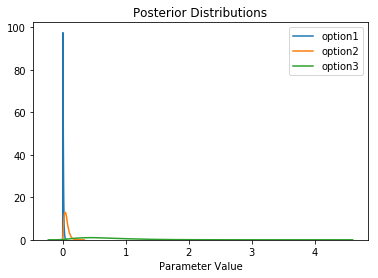

In [13]:
experiment.plot_posterior()